In [11]:
import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image


[ 1  1  1  1  1 10 10 10 10 10  1  1  1  1  1 10 10 10 10 10  1  1  1  1
  1 10 10 10 10 10  1  1  1  1  1 10 10 10 10 10  1  1  1  1  1 10 10 10
 10 10]


Text(0.5, 1.0, 'Array Plot')

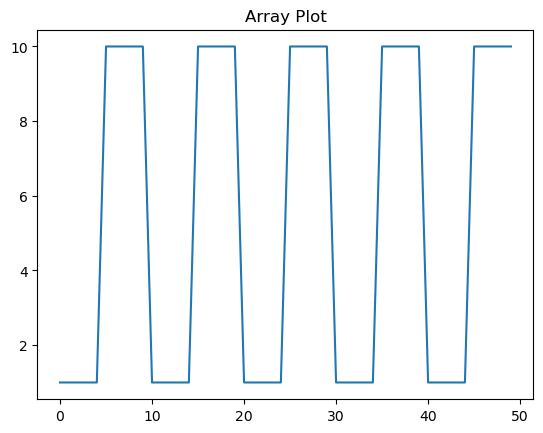

In [12]:
# this is descrete array befor doing convolution
array = np.array([1 if (i // 5) % 2 == 0 else 10 for i in range(50)])
print(array)
#plot the array
plt.plot(array)
plt.title('Array Plot')


[ 0.1  0.3  0.7  0.9  1.   1.9  3.7  7.3  9.1 10.   9.1  7.3  3.7  1.9
  1.   1.9  3.7  7.3  9.1 10.   9.1  7.3  3.7  1.9  1.   1.9  3.7  7.3
  9.1 10.   9.1  7.3  3.7  1.9  1.   1.9  3.7  7.3  9.1 10.   9.1  7.3
  3.7  1.9  1.   1.9  3.7  7.3  9.1 10.   9.   7.   3.   1. ]


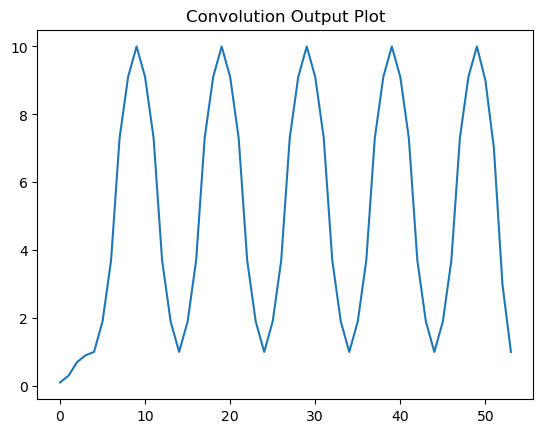

In [13]:
#then i will make another array to do convolution  that it's summation it's values is 1
kernel = np.array([0.1,0.2,0.4,0.2,0.1])
output = np.convolve(array, kernel)
print(output)
#plot the output
plt.plot(output)
plt.title('Convolution Output Plot')
plt.show()
# in this we added weights into the midle values of the array

Text(0.5, 1.0, 'Original Image')

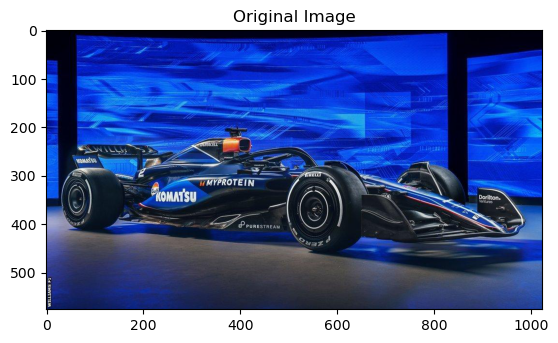

In [14]:
#now we will apply convlution on the image
img = cv2.imread('_132601228_williamsf1.jpg')
#now print the image before convolution as it is in original colors using matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')



In [15]:
# print the values of matrix pixels rgb
print(img)


[[[ 10   0   0]
  [ 10   0   0]
  [ 10   0   0]
  ...
  [ 11   1   1]
  [ 11   1   1]
  [ 11   1   1]]

 [[ 10   0   0]
  [ 10   0   0]
  [ 10   0   0]
  ...
  [ 11   1   1]
  [ 11   1   1]
  [ 11   1   1]]

 [[ 10   0   0]
  [ 10   0   0]
  [ 10   0   0]
  ...
  [ 11   1   1]
  [ 11   1   1]
  [ 11   1   1]]

 ...

 [[102  27  13]
  [ 78   4   0]
  [ 95  30  16]
  ...
  [154  62  27]
  [156  64  29]
  [161  69  34]]

 [[102  27  13]
  [129  56  42]
  [ 89  22   7]
  ...
  [155  63  28]
  [157  63  28]
  [160  66  31]]

 [[107  32  18]
  [ 90  17   3]
  [ 98  29  14]
  ...
  [158  66  31]
  [158  64  29]
  [160  66  31]]]


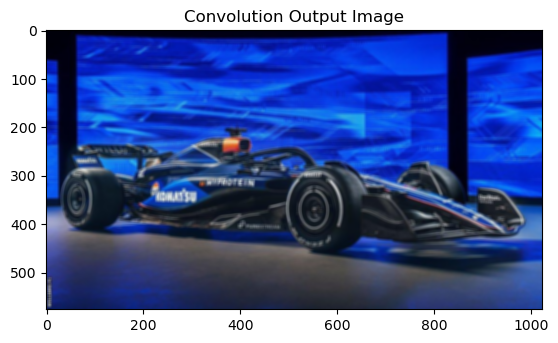

[[[ 10   0   0]
  [ 10   0   0]
  [ 10   0   0]
  ...
  [ 12   1   1]
  [ 12   1   1]
  [ 12   1   1]]

 [[ 10   0   0]
  [ 10   0   0]
  [ 10   0   0]
  ...
  [ 12   1   1]
  [ 12   1   1]
  [ 12   1   1]]

 [[ 10   0   0]
  [ 10   0   0]
  [ 10   0   0]
  ...
  [ 12   1   1]
  [ 12   1   1]
  [ 12   1   1]]

 ...

 [[ 93  27  16]
  [101  36  24]
  [103  41  29]
  ...
  [157  65  30]
  [157  65  30]
  [157  65  30]]

 [[ 95  28  16]
  [ 99  33  20]
  [ 97  33  21]
  ...
  [157  65  30]
  [157  65  30]
  [157  65  30]]

 [[ 96  28  17]
  [ 96  29  17]
  [ 92  28  16]
  ...
  [157  65  30]
  [157  65  30]
  [157  65  30]]]


'\noutput = cv2.filter2D(img, -1, kernel_7x7)\ncv2.filter2D(): General convolution (any kernel)\n\ncv2.blur(): Optimized for box filters (like your averaging kernel)\n\ncv2.GaussianBlur(): Uses Gaussian-weighted kernel\n'

In [16]:
#adding the kernel to the image  kernel is 3x3 symmetric matrix have values of 1/9
kernel_7x7 = np.ones((7,7), np.float32) / 49  # Each cell = 1/49

# in the next line  i will do convolution on the image
output = cv2.filter2D(img, -1, kernel_7x7)
# print the output image
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title('Convolution Output Image')
plt.show()
print (output)
"""
Syntax explaination:
np.ones((7,7), np.float32)
np.ones() creates a NumPy array filled with 1s.

(7,7) defines the shape of the kernel (7 rows × 7 columns).

np.float32 specifies the data type (32-bit floating-point numbers).

"""

"""
output = cv2.filter2D(img, -1, kernel_7x7)
cv2.filter2D(): General convolution (any kernel)

cv2.blur(): Optimized for box filters (like your averaging kernel)

cv2.GaussianBlur(): Uses Gaussian-weighted kernel
"""





In [17]:
def apply_normal_blur(image):
    """Applies a 7x7 averaging blur to the input image and returns the result."""
    kernel_size = (20, 20)
    kernel = np.ones(kernel_size, np.float32) / (kernel_size[0] * kernel_size[1])
    blurred_image = cv2.filter2D(image, -1, kernel)
    return blurred_image

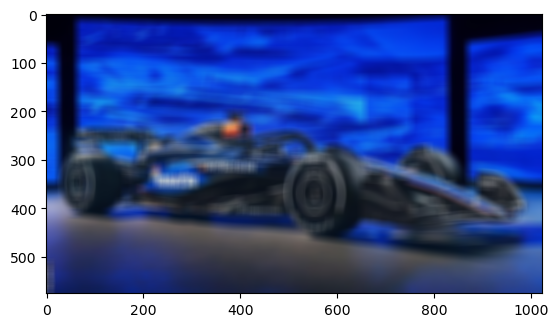

In [18]:
#call the  function
image = cv2.imread('_132601228_williamsf1.jpg')
blurred_image = apply_normal_blur(image)
#print the blurred image
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))


In [19]:
# in here we re write all types of kernels 
kernel_sharpen = np.array([0, -1, 0,
                        -1, 5, -1,
                        0, -1, 0])

kernel_7x7_blur = np.ones((7,7), np.float32) / 49





In [24]:
# implement in gradio and make user to choose the kernel blur or sharpen
def apply_convolution(image, kernel_type):
    """Applies a convolution with the specified kernel to the input image."""
    if kernel_type == "Sharpen":
        kernel = kernel_sharpen
    elif kernel_type == "Blur":
        kernel = kernel_7x7_blur
    elif kernel_type == "Gray":
        return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        raise ValueError("Invalid kernel type")
    
    return cv2.filter2D(image, -1, kernel)
# Create a Gradio interface
interface = gr.Interface(
    fn=apply_convolution,
    inputs=[
        gr.Image(type="numpy"),
        gr.Radio(["Sharpen", "Blur" , "Gray"], label="Select Kernel Type")
    ],
    outputs=gr.Image(type="numpy"),
    title="Apply Convolution with Selected Kernel",
    description="Upload an image and select a kernel type (Sharpen or Blur) to apply."
)
# Launch the interface
interface.launch()


* Running on local URL:  http://127.0.0.1:7863
* To create a public link, set `share=True` in `launch()`.


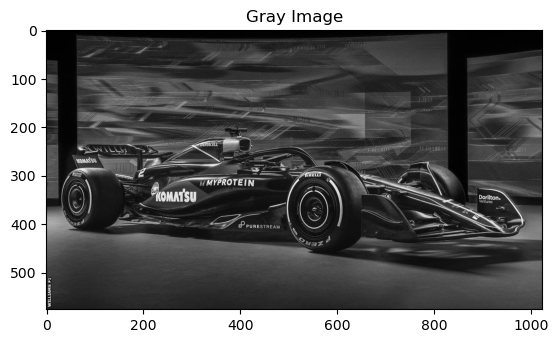

In [23]:

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#print the gray image
plt.imshow(gray, cmap='gray')
plt.title('Gray Image')
plt.show()
